In [1]:
%cd /work/project/escience/ruttho/Sample

/work/project/escience/ruttho/Sample


In [2]:
with open("MG5Card.dat", "w") as f:
    f.write("generate e+ e- > h z, z > l+ l-\n")
    f.write("output eehz_varyhmass\n")
    f.write("launch\n")
    f.write("set nevents 100\n")
    f.write("set ebeam1 120\n")
    f.write("set ebeam2 120\n")
    f.write("set mass 25 100\n")
    for i in range(101,200):
        f.write(f"launch\n")
        f.write(f"set mass 25 {i}\n")

In [3]:
%cd eehz_varyhmass/Events/

/work/project/escience/ruttho/Sample/eehz_varyhmass/Events


In [77]:
import os
import subprocess
mh_list=[]
xsec_list=[]
for folder in os.listdir():
    if folder[:3]!="run":
        continue
    os.chdir(folder)
    # os.system("grep '# mh' *.txt >> ../../../mh.txt")
    # os.system("grep '#  Integrated weight' *.txt >> ../../../xsec.txt")
    mh=subprocess.run(['grep', '# mh', f"{folder}_tag_1_banner.txt"], text=True, capture_output=True).stdout
    xsec=subprocess.run(['grep', '#  Integrated weight', f"{folder}_tag_1_banner.txt"], text=True, capture_output=True).stdout
    mh_list.append(float(mh.split(" ")[-3]))
    try:
        xsec_list.append(float(xsec.split(" ")[-1][:-1]))
    except:
        xsec_list.append(0)
    os.chdir("..")

In [82]:
sorted_pairs = sorted(zip(mh_list, xsec_list))
sorted_mh, sorted_xsec = zip(*sorted_pairs)

In [84]:
sorted_xsec

(0.024697,
 0.024508,
 0.024215,
 0.02382,
 0.023548,
 0.023144,
 0.022885,
 0.022538,
 0.022173,
 0.021843,
 0.021478,
 0.021155,
 0.020722,
 0.020437,
 0.020082,
 0.019725,
 0.019409,
 0.018974,
 0.018604,
 0.018268,
 0.017838,
 0.017506,
 0.017143,
 0.016739,
 0.016267,
 0.015887,
 0.015482,
 0.015079,
 0.014632,
 0.014209,
 0.013841,
 0.013383,
 0.012879,
 0.012468,
 0.011976,
 0.011522,
 0.011016,
 0.010529,
 0.0099574,
 0.0094545,
 0.008871,
 0.0082989,
 0.0076655,
 0.0070271,
 0.0063027,
 0.0055333,
 0.0047051,
 0.0037488,
 0.0026682,
 0.0016169,
 0.00097515,
 0.00065984,
 0.000489,
 0.00037669,
 0.00030324,
 0.00024849,
 0.00020522,
 0.00017346,
 0.00014646,
 0.00012445,
 0.0001065,
 9.1642e-05,
 7.9934e-05,
 6.8453e-05,
 5.9004e-05,
 5.0752e-05,
 4.4431e-05,
 3.7999e-05,
 3.2457e-05,
 2.8018e-05,
 2.3705e-05,
 2.0457e-05,
 1.702e-05,
 1.4276e-05,
 1.2055e-05,
 9.8103e-06,
 8.0565e-06,
 6.4333e-06,
 5.0238e-06,
 3.8467e-06,
 2.8557e-06,
 2.0107e-06,
 1.298e-06,
 7.4145e-07,
 3.

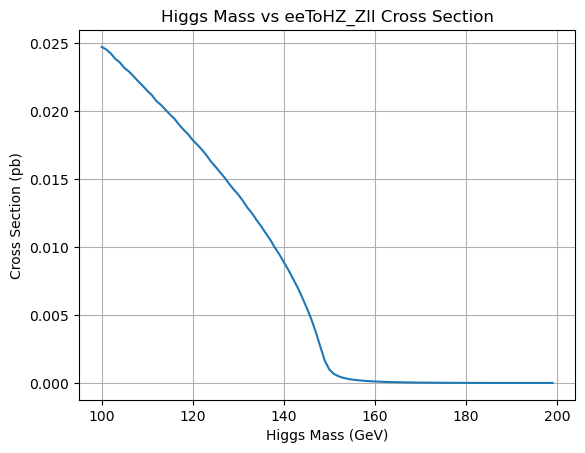

In [91]:
import matplotlib.pyplot as plt
plt.plot(sorted_mh, sorted_xsec)
plt.xlabel('Higgs Mass (GeV)')
plt.ylabel('Cross Section (pb)')
plt.title('Higgs Mass vs eeToHZ_Zll Cross Section')
# plt.yscale('log')
plt.grid()
plt.show()

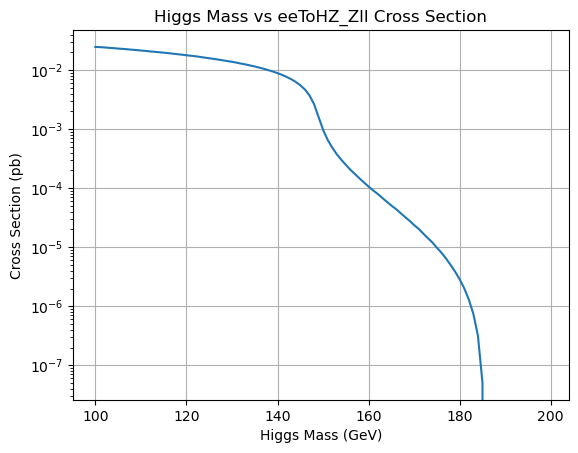

In [92]:
plt.plot(sorted_mh, sorted_xsec)
plt.xlabel('Higgs Mass (GeV)')
plt.ylabel('Cross Section (pb)')
plt.title('Higgs Mass vs eeToHZ_Zll Cross Section')
plt.yscale('log')
plt.grid()
plt.show()

In [27]:
os.chdir("run_01")

In [28]:
%ls

run_01_tag_1_banner.txt  unweighted_events.lhe.gz


In [46]:
os.chdir('run_01')
a=subprocess.run(['grep', '#  Integrated weight', "run_01_tag_1_banner.txt"], text=True, capture_output=True).stdout
os.chdir("..")

In [63]:
# float(a.split(" ")[-3])
b=a.split(" ")[-1]

In [70]:
c=float(b[:-1])

In [69]:
b[:-1]

'0.024697'